In [65]:
import json 
import matplotlib.pyplot as plt 

In [37]:
def readJsonManually():
    f = open('data.json','r', encoding='utf8')
    data = json.load(f) 
    f.close()
    return data

def saveJson(dictt):
    f = open('newData.json','w', encoding='utf8')
    data = json.dump(dictt,f) 
    f.close()

In [38]:
data = readJsonManually()

In [39]:
userInfo = data['UserInfo']

In [40]:
targetHistory = data['TargetHistory']

In [41]:
usageHistory = data['UsageHistory']

In [42]:
st = {}
st = set()

for x in userInfo:
  user = userInfo[x]
  if "weekFourTwoStartTime" in user:
    st.add(x)

for x in userInfo:
  user = userInfo[x]
  if "weekThreeStartTime" in user:
    item = checkPoints[x]
    if item['weekNumber'] == 1:
      st.add(x)

for i in st:
  print(i)

2016331012
2016331102
2016331072
2016331006
2016331049
0000000202


In [43]:
tempUserInfo = {}
tempUsage = {}
tempTarget = {}

for i in st:
    tempUserInfo[i] = userInfo[i]
    tempUsage[i] = usageHistory[i]
    tempTarget[i] = targetHistory[i]
    

userInfo = tempUserInfo
targetHistory = tempTarget
usageHistory = tempUsage
data['TargetHistory'] = targetHistory
data['UserInfo'] = userInfo
data['UsageHistory'] = usageHistory

saveJson(data)


In [44]:
weekPeriod = 7 * 24 * 60 * 60 * 1000
hour = 60 * 60 * 1000

In [64]:
"weekOneStartTime"
"weekTwoStartTime"
"weekThreeStartTime"

weekOne = 0
weekTwo = 0
weekThree = 0
weekFour = 0

avgUsage = [0,0,0]

userCount = 0

for key in userInfo:
    userCount+=1
    user = userInfo[key]
    weekTwo = user["weekTwoStartTime"]
    weekOne = weekTwo - weekPeriod
    weekThree = weekTwo + weekPeriod
    weekFour = weekThree + weekPeriod

    
    usage = usageHistory[key]
    
    for i in range(weekOne,weekTwo,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            hourlyUsage = hourlyUsageArray[0]
            avgUsage[0]+=hourlyUsage["foregroundTime"]
            
    for i in range(weekTwo,weekThree,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            hourlyUsage = hourlyUsageArray[0]
            avgUsage[1]+=hourlyUsage["foregroundTime"]
            
            
    for i in range(weekThree,weekFour,hour):
        ind = str(i)
        if ind in usage:
            hourlyUsageArray = usage[ind]
            hourlyUsage = hourlyUsageArray[0]
            avgUsage[2]+=hourlyUsage["foregroundTime"]
            
            
avgUsage = [x / userCount for x in avgUsage]
print(avgUsage)

[20445367.666666668, 12746715.333333334, 17466657.5]


<BarContainer object of 3 artists>

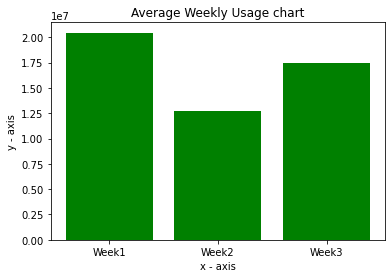

In [71]:
tick_label = ['Week1', 'Week2', 'Week3']
left = [1,2,3]
plt.xlabel('x - axis') 
plt.ylabel('y - axis')
plt.title('Average Weekly Usage chart') 
plt.bar(left, avgUsage
, tick_label = tick_label, 
        width = 0.8, color = ['green']) 